In [1]:
import pandas as pd
df = pd.read_csv('cthall_no_covid.csv')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682323 entries, 0 to 682322
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        682323 non-null  int64  
 1   tran_date         682323 non-null  object 
 2   tran_time         682323 non-null  int64  
 3   play_date         682323 non-null  int64  
 4   seat              682323 non-null  object 
 5   price             682323 non-null  int64  
 6   performance_code  682323 non-null  int64  
 7   pre_open_date     420761 non-null  object 
 8   open_date         682323 non-null  object 
 9   genre             666398 non-null  object 
 10  running_time      682323 non-null  int64  
 11  member_yn         682323 non-null  object 
 12  time              682323 non-null  object 
 13  floor             682323 non-null  object 
 14  zone              682323 non-null  object 
 15  col               682323 non-null  object 
 16  ori_price         68

In [68]:
df.columns

Index(['Unnamed: 0', 'tran_date', 'tran_time', 'play_date', 'seat', 'price',
       'performance_code', 'pre_open_date', 'open_date', 'genre',
       'running_time', 'member_yn', 'time', 'floor', 'zone', 'col',
       'ori_price', 'date_diff'],
      dtype='object')

In [69]:
df_group = df.groupby(['performance_code','play_date'],as_index=False).agg({'floor' : 'count',
                                                     'ori_price':'sum',
                                                                     'price':'sum'})
df_group.rename(columns = {'floor' : 'cus_count',
                    'ori_price' : 'ori_total_price',
                          'price' : 'total_price'},inplace=True)
pd.options.display.float_format = '{:.2f}'.format

In [70]:
df_group

,performance_code,play_date,cus_count,ori_total_price,total_price
0,1,20230426,870,1632727.27,1323000
1,7,20190830,2110,557272.73,429000
2,23,20191025,943,21093827.75,20695000
3,29,20190822,1868,0.00,0
4,29,20190823,1802,0.00,0
...,...,...,...,...,...
490,2903,20221008,1167,1204545.45,927000
491,2920,20190117,915,35643636.36,24706000
492,2932,20191225,69,1913636.36,1810000
493,2936,20220710,685,45373684.21,47134000


In [71]:
df_total = pd.merge(df,df_group, how = 'left',left_on=['performance_code','play_date'],right_on=['performance_code','play_date'])

In [72]:
df_total.columns

Index(['Unnamed: 0', 'tran_date', 'tran_time', 'play_date', 'seat', 'price',
       'performance_code', 'pre_open_date', 'open_date', 'genre',
       'running_time', 'member_yn', 'time', 'floor', 'zone', 'col',
       'ori_price', 'date_diff', 'cus_count', 'ori_total_price',
       'total_price'],
      dtype='object')

- genre, time -> BarChart
- running_time, date_diff -> Scatter

In [73]:
df_total[(df_total['ori_total_price']!=0) & (df_total['cus_count']!=0)]

,Unnamed: 0,tran_date,tran_time,play_date,seat,price,performance_code,pre_open_date,open_date,genre,...,member_yn,time,floor,zone,col,ori_price,date_diff,cus_count,ori_total_price,total_price
1,7,2019-06-13,954,20190723,2층 D블록8열 4,0,827,2019-06-02,2019-06-02,교향곡,...,N,morning,2층,D블록,8열,0.00,11.00,1878,3371818.18,3185000
2,9,2019-07-03,908,20190721,1층 C블록17열 3,75000,1528,NaN,2019-04-13,클래식,...,N,morning,1층,C블록,17열,68181.82,NaN,1399,22861272.73,24137000
3,11,2019-10-05,1417,20191201,3층 BOX9 5,24000,315,NaN,2019-10-05,오페라,...,Y,afternoon,3층,BOX,9,30000.00,NaN,550,12158277.51,10778000
4,16,2023-02-24,2214,20230412,1층 C블록2열 2,130000,1684,2023-02-18,2023-02-19,합창,...,Y,evening,1층,C블록,2열,118181.82,6.00,1247,48099138.76,46151000
5,18,2019-12-20,1106,20200211,2층 BOX2 2,42000,76,2019-12-20,2019-12-23,클래식,...,Y,morning,2층,BOX,2,60000.00,0.00,1957,11259090.91,7372000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682315,1920845,2022-06-02,1512,20220705,1층 B블록21열 8,0,1862,NaN,2022-05-21,합창,...,N,afternoon,1층,B블록,21열,0.00,NaN,2164,4019090.91,3558000
682318,1920849,2023-05-16,1743,20230603,3층 D블록6열 6,40000,1666,2023-03-17,2023-03-18,실내악,...,Y,afternoon,3층,D블록,6열,36363.64,60.00,1337,82728421.05,78448000
682319,1920850,2019-09-29,934,20191010,2층 E블록7열 15,0,2132,2019-09-06,2019-09-06,클래식,...,N,morning,2층,E블록,7열,0.00,23.00,2432,7769090.91,7297000
682321,1920855,2023-05-22,1729,20230613,3층 A블록6열 4,10000,2825,2023-05-05,2023-05-07,교향곡,...,Y,afternoon,3층,A블록,6열,9090.91,17.00,2241,62414385.03,54783000


<Axes: xlabel='cus_count', ylabel='ori_total_price'>

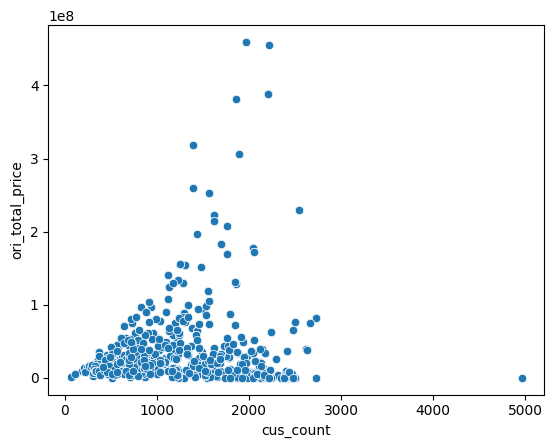

In [74]:
import seaborn as sns
sns.scatterplot(data=df_total, x="cus_count", y="ori_total_price")

<Axes: xlabel='cus_count', ylabel='running_time'>

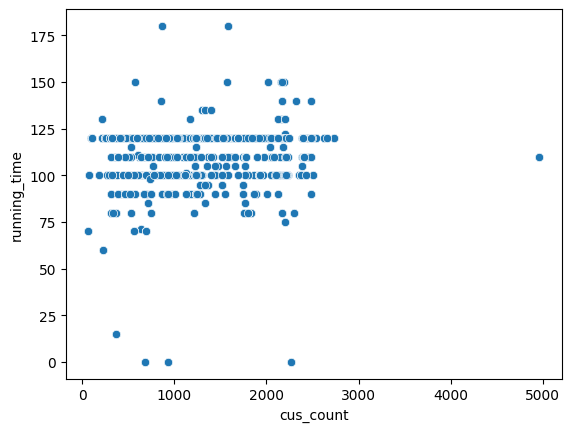

In [75]:
import seaborn as sns
sns.scatterplot(data=df_total, x="cus_count", y="running_time")

<Axes: xlabel='ori_total_price', ylabel='running_time'>

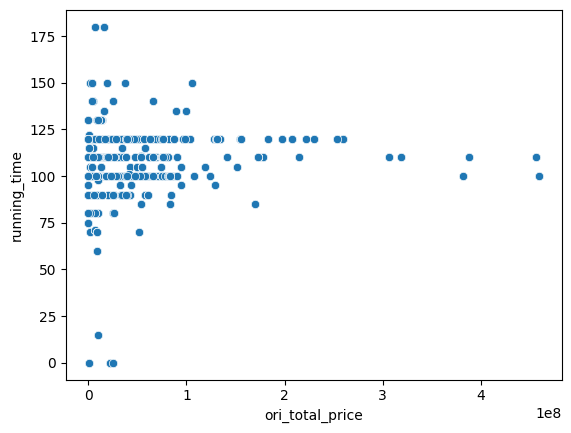

In [78]:
import seaborn as sns
sns.scatterplot(data=df_total, x="ori_total_price", y="running_time")

<Axes: xlabel='cus_count', ylabel='date_diff'>

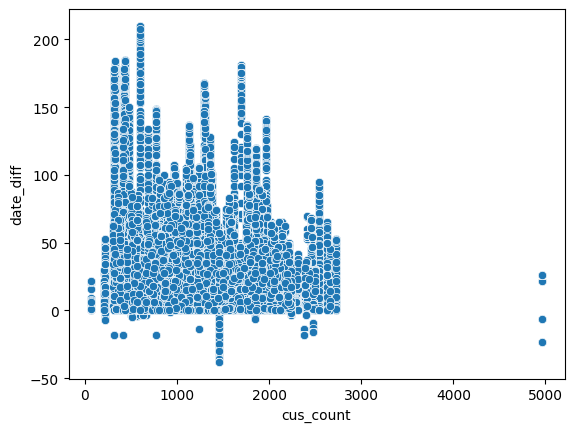

In [76]:
import seaborn as sns
sns.scatterplot(data=df_total, x="cus_count", y="date_diff")

<Axes: xlabel='ori_total_price', ylabel='date_diff'>

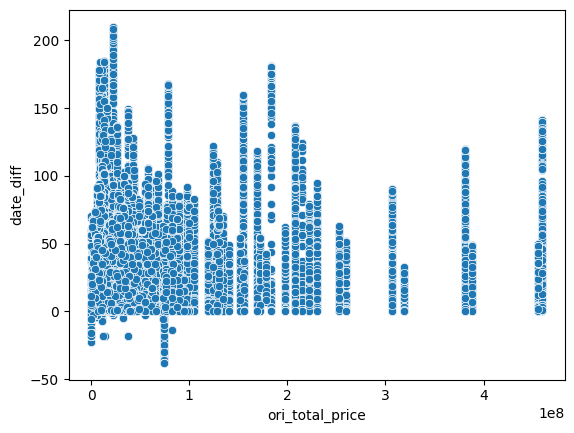

In [79]:
import seaborn as sns
sns.scatterplot(data=df_total, x="ori_total_price", y="date_diff")

In [83]:
df_total[['cus_count','ori_total_price']].corr()

,cus_count,ori_total_price
cus_count,1.00,-0.08
ori_total_price,-0.08,1.00


In [84]:
df_total[['cus_count','date_diff']].corr()

,cus_count,date_diff
cus_count,1.00,-0.30
date_diff,-0.30,1.00


In [113]:
37+34+31+29

131

## 장르별 인기 좌석

#### 구역별 좌석 수
- 1층 : 1226
  - A : 210
  - B : 260
  - C : 286
  - D : 260
  - E : 210
- 2층 : 552
  - A : 127
  - B : 84
  - C : 82
  - D : 84
  - E : 127
  - BOX : 48
- 3충 : 429
  - A : 56
  - B : 31
  - C : 46
  - D : 49
  - E : 46
  - F : 31
  - G : 56
  - M : 30
  - N : 30
  - BOX : 54
- 합창석 274
  - H : 72
  - G : 130
  - F : 72

In [3]:
df.genre.unique()

array(['교향곡', '클래식', '오페라', '합창', '성악', '실내악', '콘서트', nan, '복합장르', '기타',
       '독주', '크로스오버', '재즈'], dtype=object)

In [21]:
df['floor_zone'] = df['floor']+df['zone']
df['floor_zone'].unique()

array(['3층E블록', '2층D블록', '1층C블록', '3층BOX', '2층BOX', '1층D블록', '1층B블록',
       '3층G블록', '3층F블록', '1층E블록', '2층A블록', '1층A블록', '2층E블록', '3층D블록',
       '2층B블록', '3층A블록', '3층N블록', '합창석G블록', '2층C블록', '3층M블록', '합창석H블록',
       '3층C블록', '합창석F블록', '3층B블록'], dtype=object)

### 전체

In [7]:
# 한글
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

<Axes: xlabel='floor', ylabel='count'>

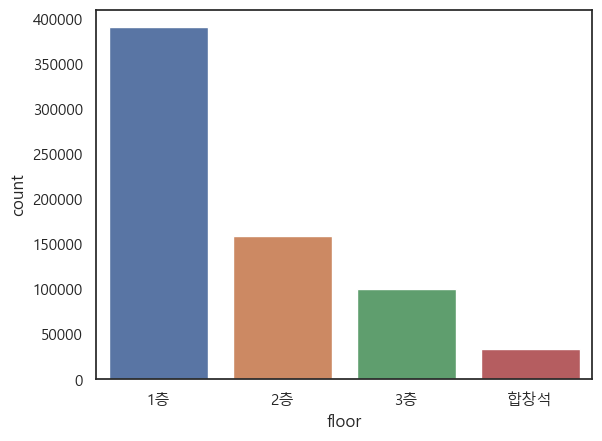

In [31]:
import seaborn as sns 
sns.countplot(x='floor',data=df,order = df['floor'].value_counts().index)

In [84]:
df[df['price']!=0].groupby('floor').price.mean().sort_values(ascending=False)

floor
1층     78370.322347
2층     61766.667256
합창석    51774.318641
3층     33605.680007
Name: price, dtype: float64

<Axes: xlabel='zone', ylabel='count'>

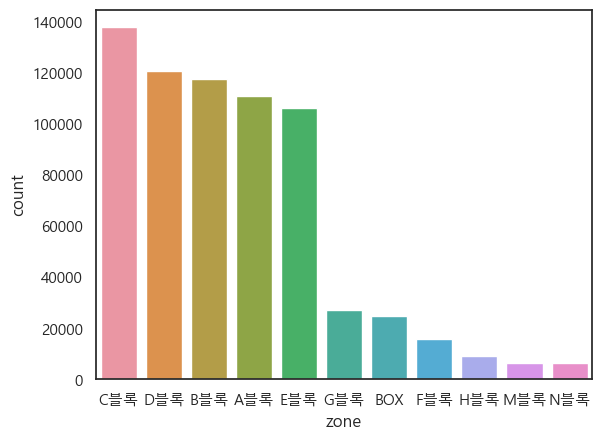

In [32]:
import seaborn as sns 
sns.countplot(x='zone',data=df,order=df['zone'].value_counts().index)

In [83]:
df[df['price']!=0].groupby('zone').price.mean().sort_values(ascending=False)

zone
C블록    75791.470813
B블록    75248.065670
D블록    69653.846154
A블록    56268.309994
E블록    55164.689400
H블록    53407.257247
BOX    48227.031664
F블록    43399.544246
G블록    43045.582674
N블록    26180.859917
M블록    26157.709012
Name: price, dtype: float64

<Axes: xlabel='count', ylabel='floor_zone'>

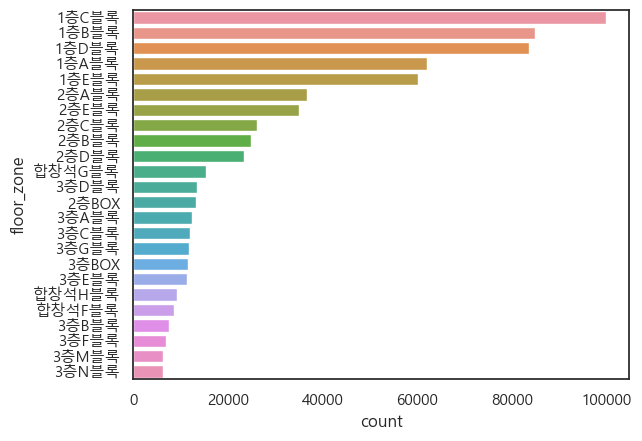

In [33]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df,order=df['floor_zone'].value_counts().index)

In [85]:
df[df['price']!=0].groupby('floor_zone').price.mean().sort_values(ascending=False)

floor_zone
1층C블록     85048.455570
1층B블록     84744.493206
1층D블록     82284.670459
2층D블록     69445.467836
2층C블록     68336.851268
2층B블록     67750.029801
1층A블록     65297.409996
1층E블록     62625.591154
2층BOX     58703.559239
2층A블록     57461.789583
2층E블록     54890.926487
합창석H블록    53407.257247
합창석G블록    51941.473826
합창석F블록    49641.260617
3층BOX     38561.103614
3층C블록     37311.528900
3층E블록     37047.388620
3층D블록     36772.913992
3층F블록     35246.131387
3층B블록     34425.981873
3층G블록     29012.050328
3층A블록     28555.483029
3층N블록     26180.859917
3층M블록     26157.709012
Name: price, dtype: float64

### 교향곡

In [22]:
df_symphony = df[df['genre']=='교향곡']
df_symphony.genre.unique()

array(['교향곡'], dtype=object)

In [16]:
df_symphony['floor_zone'] = df_symphony['floor']+df_symphony['zone']
df_symphony['floor_zone'].unique()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19760\2212488330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_symphony['floor_zone'] = df_symphony['floor']+df_symphony['zone']


array(['3층E블록', '2층D블록', '1층D블록', '1층B블록', '3층F블록', '1층C블록', '1층A블록',
       '2층E블록', '3층BOX', '3층D블록', '1층E블록', '3층A블록', '2층A블록', '3층G블록',
       '2층B블록', '2층C블록', '합창석H블록', '3층C블록', '합창석F블록', '합창석G블록', '3층B블록',
       '3층M블록', '2층BOX', '3층N블록'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

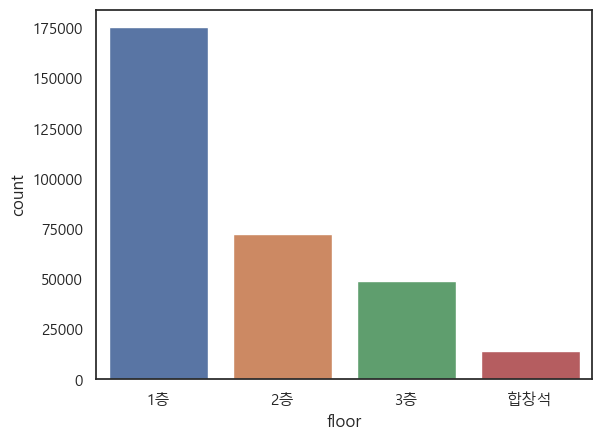

In [13]:
import seaborn as sns 
sns.countplot(x='floor',data=df_symphony,order = df_symphony['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

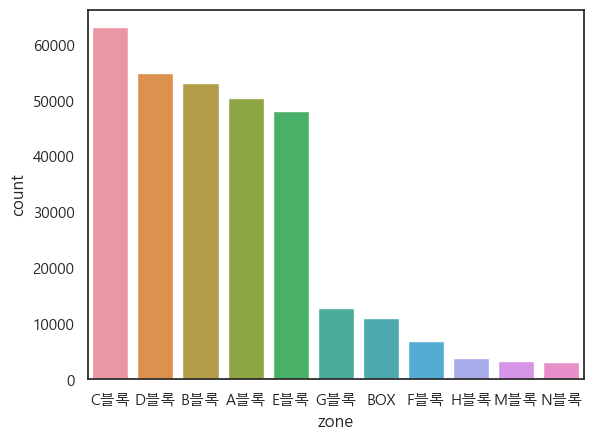

In [15]:
import seaborn as sns 
sns.countplot(x='zone',data=df_symphony,order=df_symphony['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

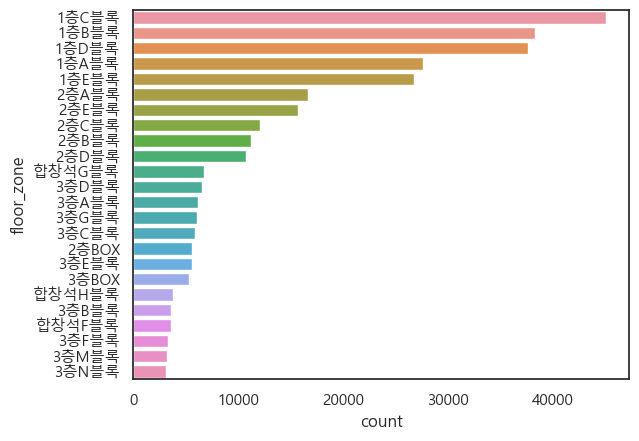

In [20]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_symphony,order=df_symphony['floor_zone'].value_counts().index)

### 클래식

In [23]:
df_classic = df[df['genre']=='클래식']
df_classic.genre.unique()

array(['클래식'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

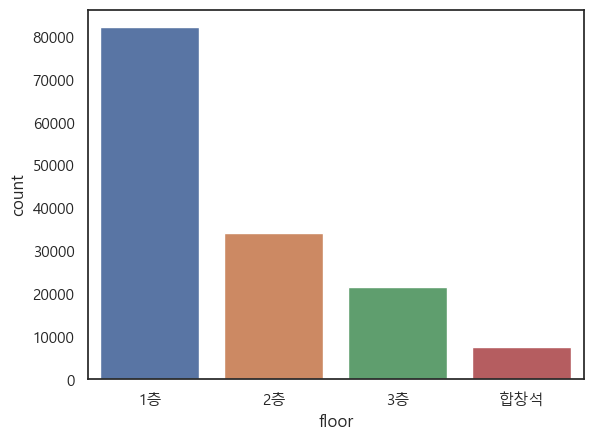

In [24]:
import seaborn as sns 
sns.countplot(x='floor',data=df_classic,order = df_classic['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

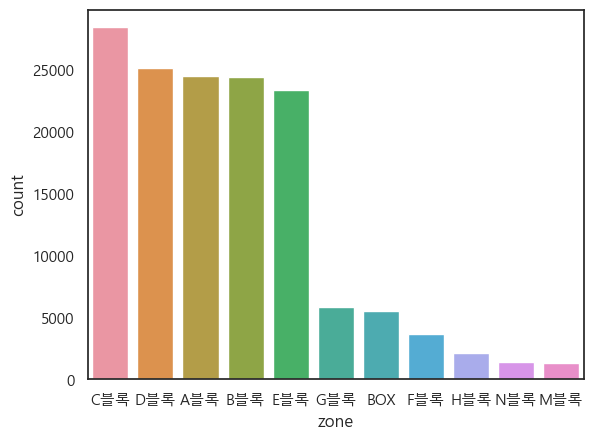

In [25]:
import seaborn as sns 
sns.countplot(x='zone',data=df_classic,order=df_classic['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

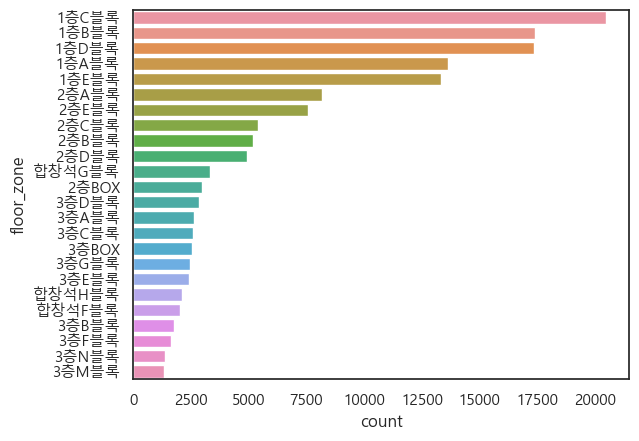

In [26]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_classic,order=df_classic['floor_zone'].value_counts().index)

### 오페라

In [27]:
df_opera = df[df['genre']=='오페라']
df_opera.genre.unique()

array(['오페라'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

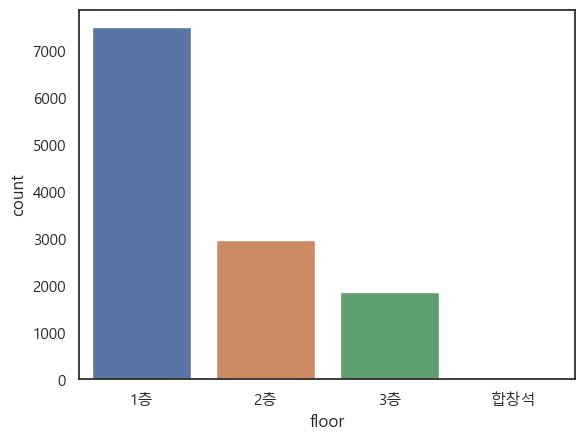

In [28]:
import seaborn as sns 
sns.countplot(x='floor',data=df_opera,order = df_opera['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

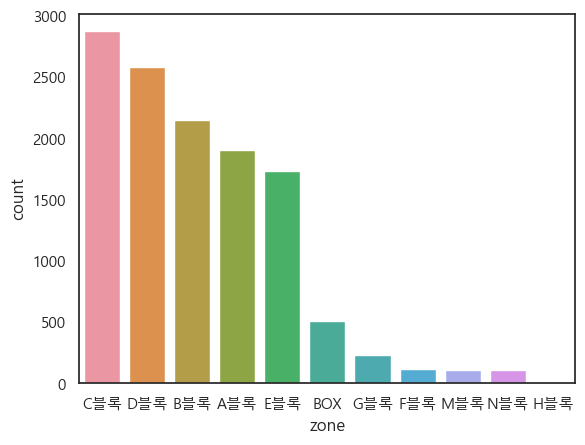

In [29]:
import seaborn as sns 
sns.countplot(x='zone',data=df_opera,order=df_opera['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

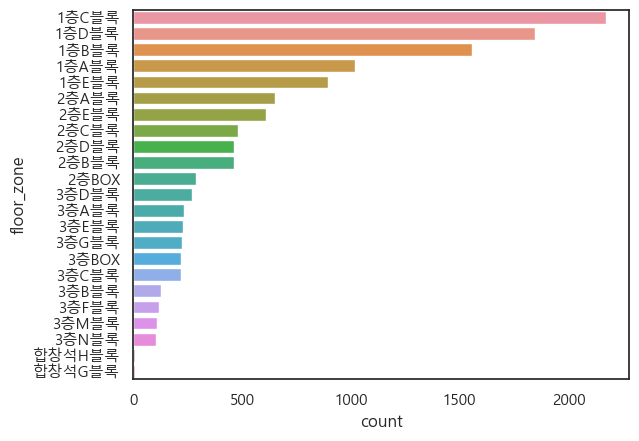

In [30]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_opera,order=df_opera['floor_zone'].value_counts().index)

### 합창

In [35]:
df_choir = df[df['genre']=='합창']
df_choir.genre.unique()

array(['합창'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

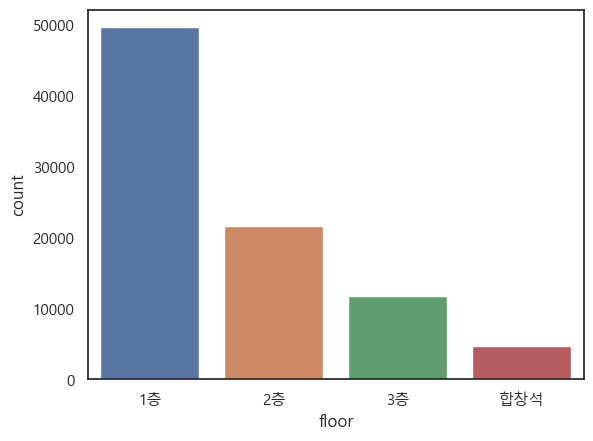

In [36]:
import seaborn as sns 
sns.countplot(x='floor',data=df_choir,order = df_choir['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

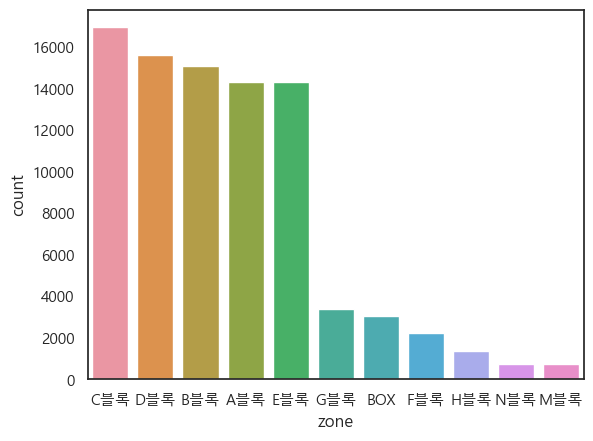

In [37]:
import seaborn as sns 
sns.countplot(x='zone',data=df_choir,order=df_choir['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

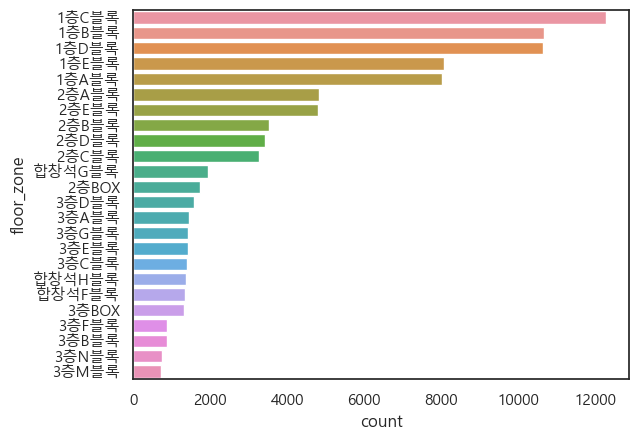

In [38]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_choir,order=df_choir['floor_zone'].value_counts().index)

### 성악

In [39]:
df_vocal_music = df[df['genre']=='성악']
df_vocal_music.genre.unique()

array(['성악'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

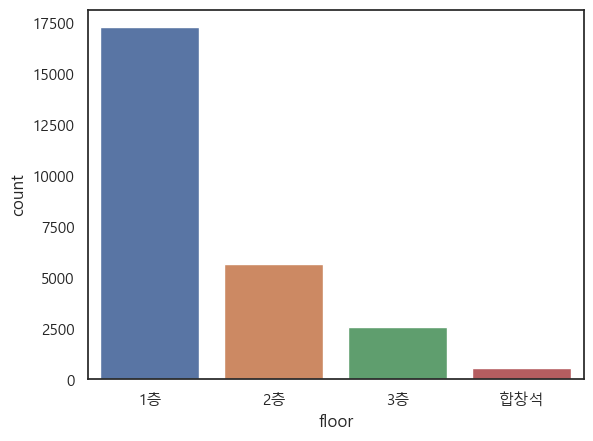

In [40]:
import seaborn as sns 
sns.countplot(x='floor',data=df_vocal_music,order = df_vocal_music['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

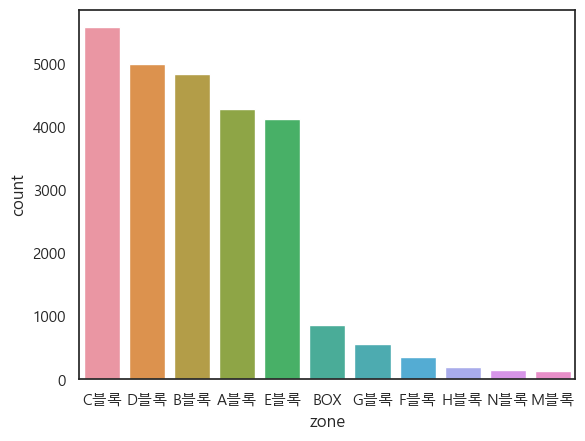

In [41]:
import seaborn as sns 
sns.countplot(x='zone',data=df_vocal_music,order=df_vocal_music['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

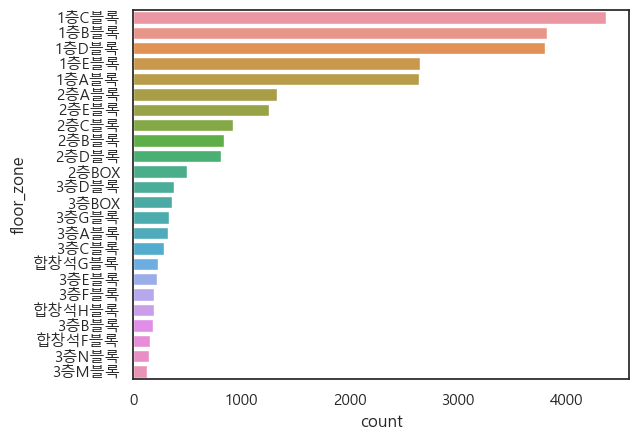

In [42]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_vocal_music,order=df_vocal_music['floor_zone'].value_counts().index)

### 실내악

In [44]:
df_chamber_music = df[df['genre']=='실내악']
df_chamber_music.genre.unique()

array(['실내악'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

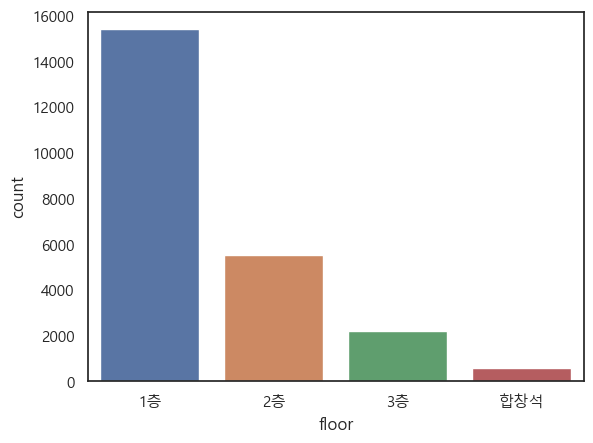

In [45]:
import seaborn as sns 
sns.countplot(x='floor',data=df_chamber_music,order = df_chamber_music['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

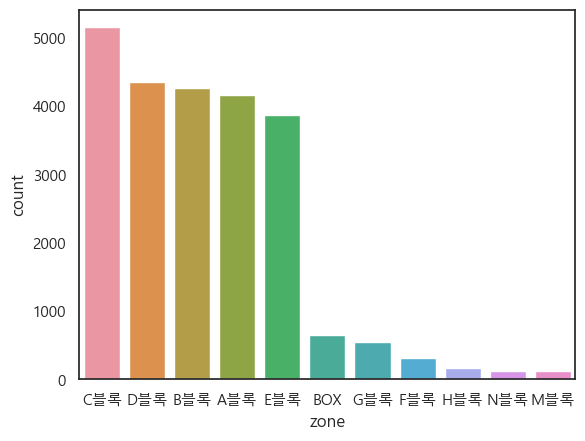

In [46]:
import seaborn as sns 
sns.countplot(x='zone',data=df_chamber_music,order=df_chamber_music['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

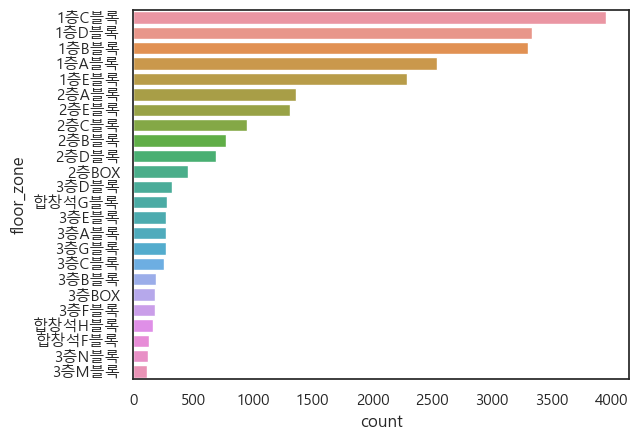

In [47]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_chamber_music,order=df_chamber_music['floor_zone'].value_counts().index)

### 콘서트

In [48]:
df_concert = df[df['genre']=='콘서트']
df_concert.genre.unique()

array(['콘서트'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

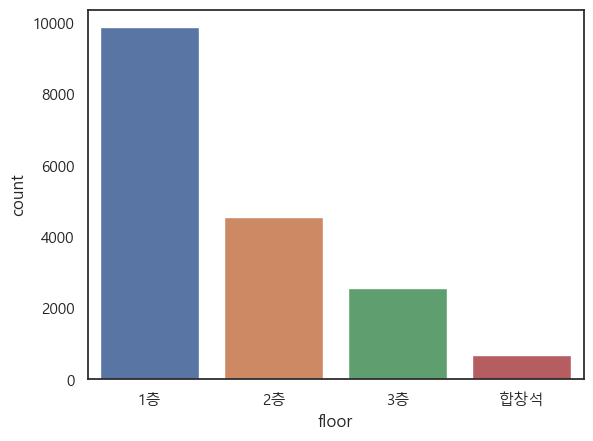

In [49]:
import seaborn as sns 
sns.countplot(x='floor',data=df_concert,order = df_concert['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

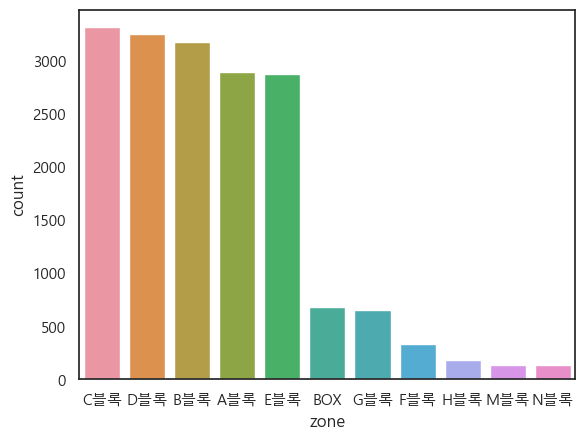

In [50]:
import seaborn as sns 
sns.countplot(x='zone',data=df_concert,order=df_concert['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

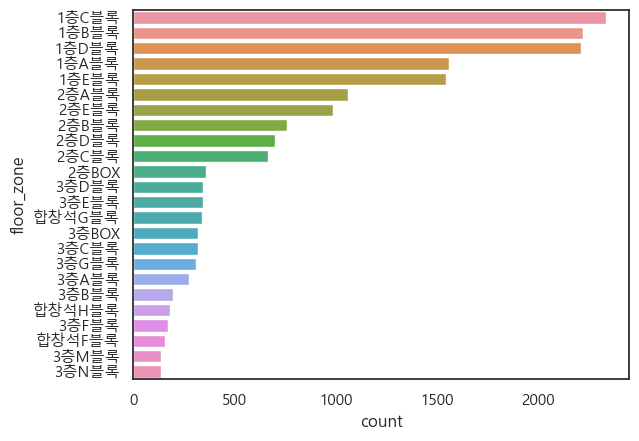

In [51]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_concert,order=df_concert['floor_zone'].value_counts().index)

### 복합장르

In [52]:
df_compound_genre = df[df['genre']=='복합장르']
df_compound_genre.genre.unique()

array(['복합장르'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

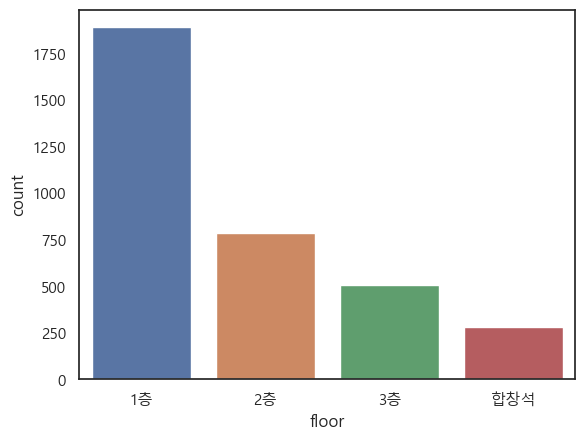

In [53]:
import seaborn as sns 
sns.countplot(x='floor',data=df_compound_genre,order = df_compound_genre['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

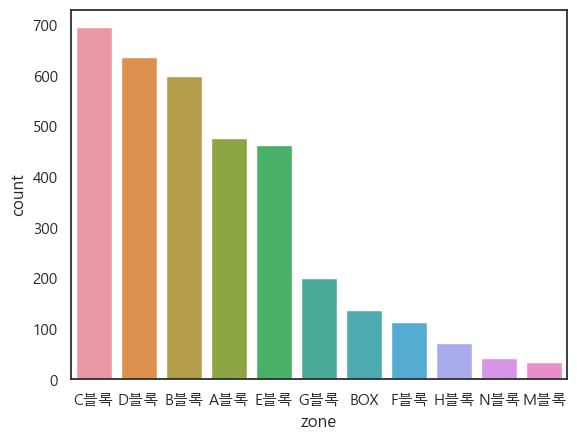

In [54]:
import seaborn as sns 
sns.countplot(x='zone',data=df_compound_genre,order=df_compound_genre['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

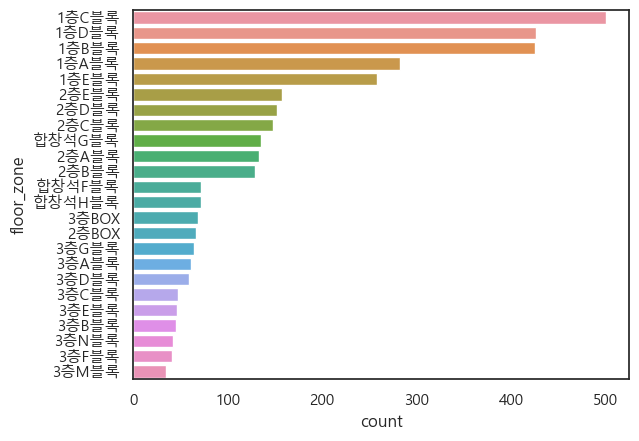

In [55]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_compound_genre,order=df_compound_genre['floor_zone'].value_counts().index)

### 기타

In [56]:
df_guitar = df[df['genre']=='기타']
df_guitar.genre.unique()

array(['기타'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

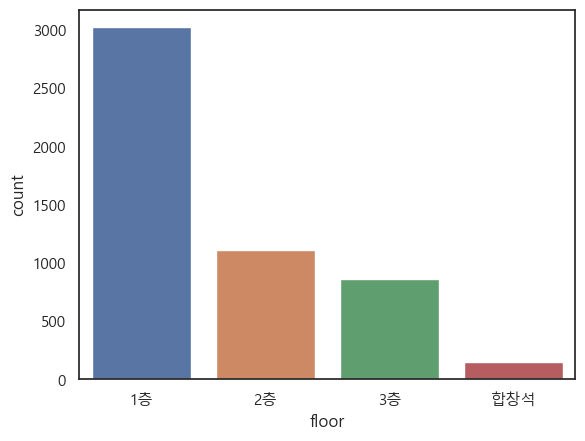

In [57]:
import seaborn as sns 
sns.countplot(x='floor',data=df_guitar,order = df_guitar['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

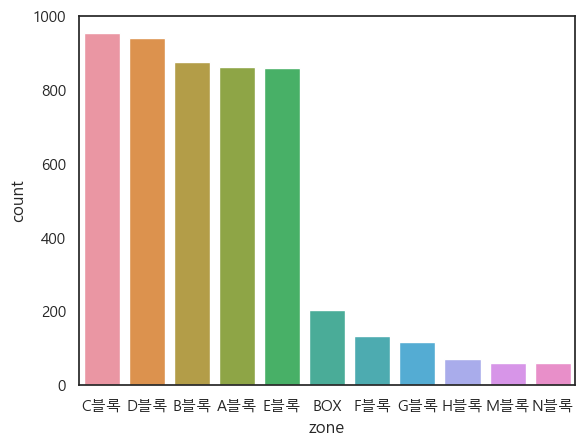

In [58]:
import seaborn as sns 
sns.countplot(x='zone',data=df_guitar,order=df_guitar['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

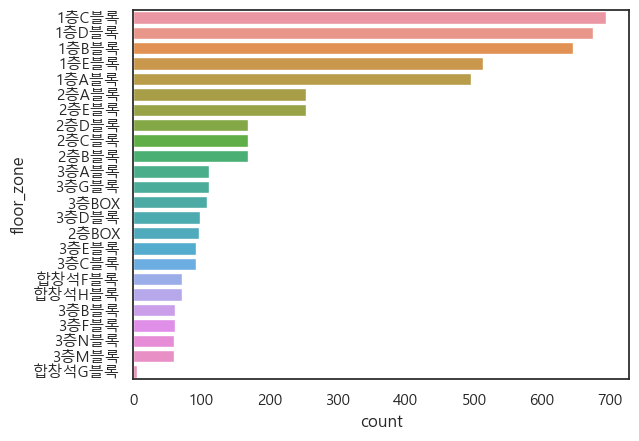

In [59]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_guitar,order=df_guitar['floor_zone'].value_counts().index)

### 독주

In [60]:
df_solo = df[df['genre']=='독주']
df_solo.genre.unique()

array(['독주'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

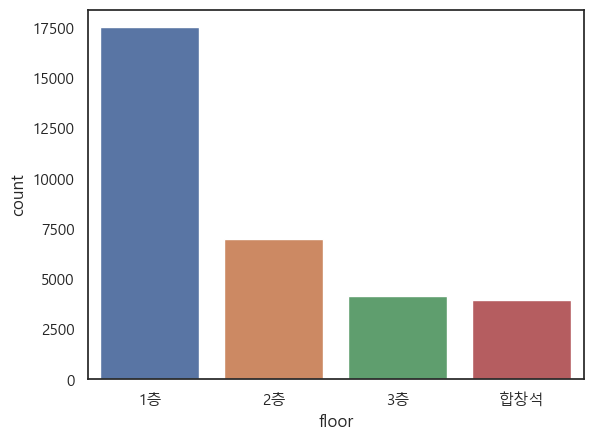

In [61]:
import seaborn as sns 
sns.countplot(x='floor',data=df_solo,order = df_solo['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

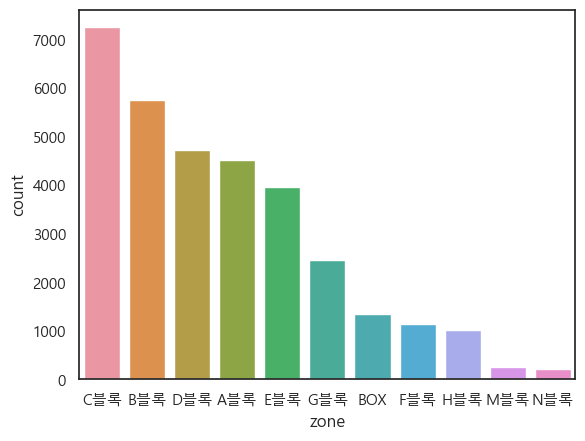

In [62]:
import seaborn as sns 
sns.countplot(x='zone',data=df_solo,order=df_solo['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

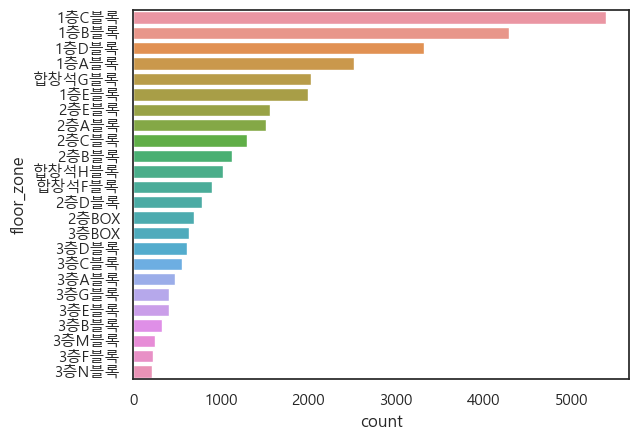

In [63]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_solo,order=df_solo['floor_zone'].value_counts().index)

### 크로스오버

In [64]:
df_crossover = df[df['genre']=='크로스오버']
df_crossover.genre.unique()

array(['크로스오버'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

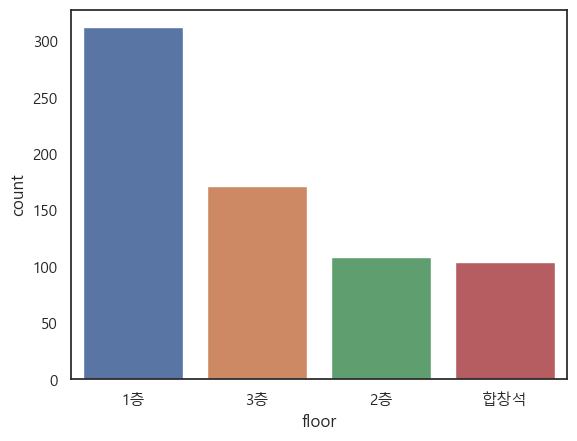

In [65]:
import seaborn as sns 
sns.countplot(x='floor',data=df_crossover,order = df_crossover['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

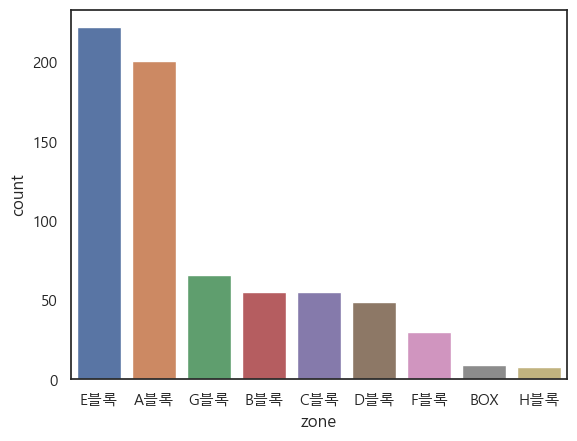

In [66]:
import seaborn as sns 
sns.countplot(x='zone',data=df_crossover,order=df_crossover['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

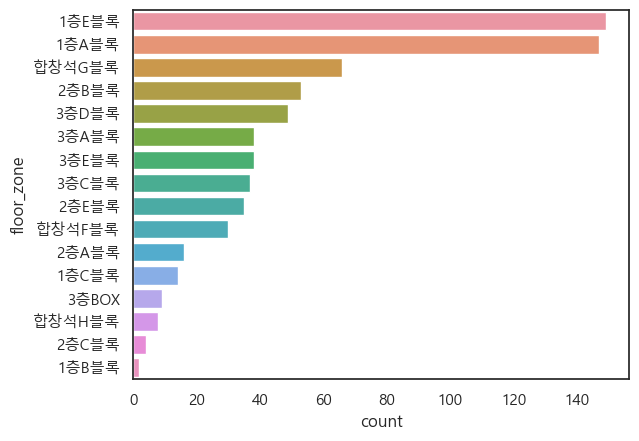

In [67]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_crossover,order=df_crossover['floor_zone'].value_counts().index)

### 재즈

In [68]:
df_jazz = df[df['genre']=='재즈']
df_jazz.genre.unique()

array(['재즈'], dtype=object)

<Axes: xlabel='floor', ylabel='count'>

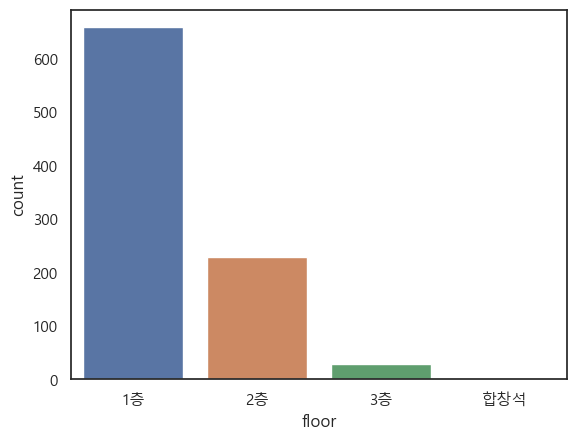

In [69]:
import seaborn as sns 
sns.countplot(x='floor',data=df_jazz,order = df_jazz['floor'].value_counts().index)

<Axes: xlabel='zone', ylabel='count'>

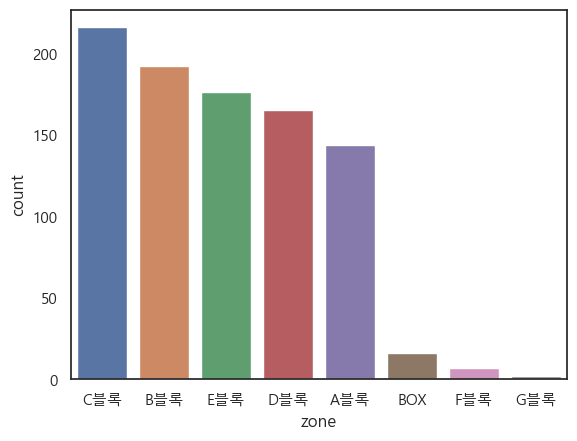

In [70]:
import seaborn as sns 
sns.countplot(x='zone',data=df_jazz,order=df_jazz['zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

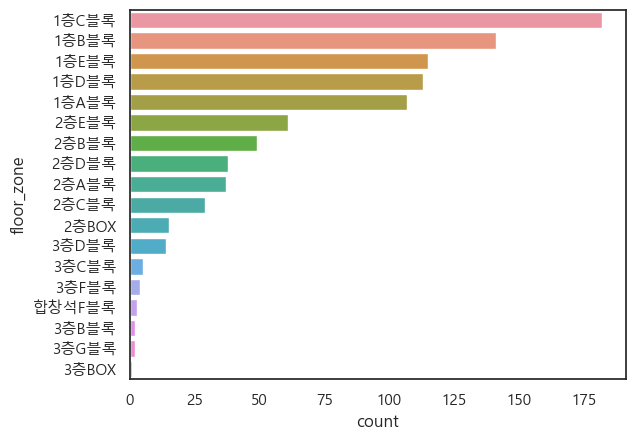

In [71]:
import seaborn as sns 
sns.countplot(y='floor_zone',data=df_jazz,order=df_jazz['floor_zone'].value_counts().index)